In [5]:
from sklearn.svm import SVC
from ml_pipeline import MLPipeline

# SVM with Wavelet Transform (subset_ratio=1/60)

In [6]:
# Initialiser le pipeline avec SVC
pipeline = MLPipeline(model=SVC(), wavelet='bior1.3')

# Charger les données avec subset_ratio=1/60
pipeline.load_data(
    train_path='./data/fashion-mnist_train.csv',
    test_path='./data/fashion-mnist_test.csv',
    subset_ratio=1/10
)

Data loaded successfully:
  Training set: 6000 samples
  Test set: 1000 samples
  Features per sample: 784


MLPipeline(model=SVC, wavelet='bior1.3', trained=False)

In [7]:
# GridSearchCV avec SVM
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['poly', 'linear']
}

pipeline.fit_with_gridsearch(
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    use_wavelets=True,
    normalize=True,
    verbose=1
)

Preparing features (normalize=True, wavelets=True)...
Starting GridSearchCV with 5-fold cross-validation...
Parameter grid: {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['poly', 'linear']}
Fitting 5 folds for each of 10 candidates, totalling 50 fits

GridSearchCV Results:
  Best parameters: {'C': 0.1, 'kernel': 'linear'}
  Best accuracy score: 0.8493



MLPipeline(model=SVC, wavelet='bior1.3', trained=True)

Preparing test features (normalize=True, wavelets=True)...
Making predictions on 1000 samples...
Predictions completed.

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.82      0.76        89
           1       0.97      0.97      0.97       101
           2       0.77      0.70      0.73       113
           3       0.88      0.89      0.89       103
           4       0.77      0.76      0.77        99
           5       0.96      0.97      0.96        91
           6       0.54      0.56      0.55        95
           7       0.93      0.90      0.91       113
           8       0.98      0.89      0.93       102
           9       0.91      0.95      0.93        94

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000




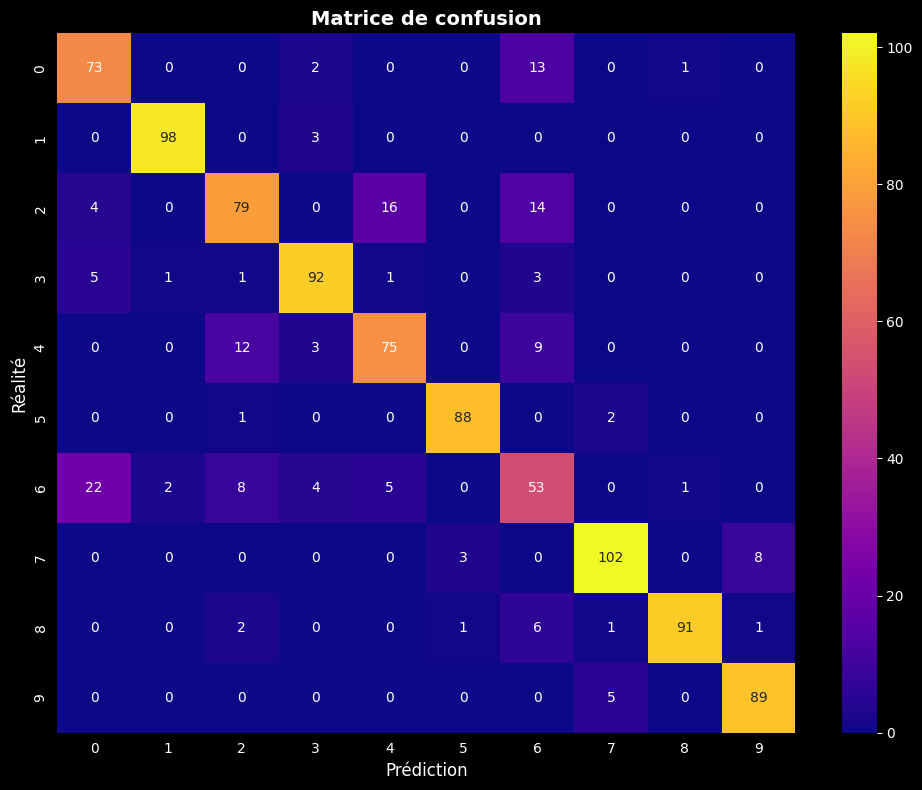

array([[ 73,   0,   0,   2,   0,   0,  13,   0,   1,   0],
       [  0,  98,   0,   3,   0,   0,   0,   0,   0,   0],
       [  4,   0,  79,   0,  16,   0,  14,   0,   0,   0],
       [  5,   1,   1,  92,   1,   0,   3,   0,   0,   0],
       [  0,   0,  12,   3,  75,   0,   9,   0,   0,   0],
       [  0,   0,   1,   0,   0,  88,   0,   2,   0,   0],
       [ 22,   2,   8,   4,   5,   0,  53,   0,   1,   0],
       [  0,   0,   0,   0,   0,   3,   0, 102,   0,   8],
       [  0,   0,   2,   0,   0,   1,   6,   1,  91,   1],
       [  0,   0,   0,   0,   0,   0,   0,   5,   0,  89]])

In [8]:
# Évaluation sur le jeu de test
pipeline.predict()
pipeline.evaluate()